In [1]:
!pip install sktime

     |████████████████████████████████| 5.5MB 3.1MB/s 
     |████████████████████████████████| 8.7MB 41.6MB/s 
     |████████████████████████████████| 6.8MB 43.6MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


# project Implementation/Structure:

As a combination of:
1.project coding framework

2.existing packages (in Python and/or R) to be used within the project coding framework

3.(optional) interactive visualizer

The approach I found the most effective for such QWIM projects is based on followings steps:

1. start by having a comprehensive literature review
2. decide on the appropriate metrics and quantitative methods within context of "good enough" for the project
3. identification of appropriate Python and/or R packages
4. code design discussions
5. coding and implementation
6. results and reports.


# 4.Code Design Discussion
(Need to implement...)

**State all packages we are going to use!**

e.g. Package: **SKtime**,**M4 Competition models**

1. Univariate Forecasting
2. Multivariate Forecasting

In this section, just shortly describe coding design, what kind of models/alogorithm/packages we have used


# 5.Coding and implementation
5.1 Data Preperation

5.2 Forecast models - Univariate Forecasting

5.3 Forecast models - Multivariate Forecasting

5.4 Performance Metrics

5.5 Metrics evaluation for each series

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from pandas import ExcelWriter
from pandas import ExcelFile
from sktime.datasets import load_airline
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import smape_loss
from sktime.performance_metrics.forecasting import mase_loss
from sktime.utils.plotting.forecasting import plot_ys
from statsmodels.tsa.stattools import adfuller
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn; seaborn.set()

## 5.1 Preperation

### 5.1.1 Read and Describe the datasets:

Risk Premia Data are retrieved from Bloomberg within the time range 1996/3/19 to 2020/7/27. We picked five equal-length ETF/sector series as example in this Project.Since most of the forecasting models require all positive values, we use risk premia + 1 as input.

We downloaded 13 weeks Treasury bill rate as risk free rate, risk premium is calculated by return - risk free rate on each day during 1996/3/19 to 2020/7/27

In [3]:
from google.colab import files
#Use to import io, which opens the file from the Colab drive
#import io
uploaded = files.upload()

Saving DATA.xlsx to DATA.xlsx


In [4]:
# Load data:
data1 = pd.read_excel('DATA.xlsx', sheet_name=2)
data1.tail()

,Date,Russeltop200,MSCIJapan,SP500IT,SP500HealthCare,SP500Industrial
6120,2020-07-13,0.988376,0.994306,0.978308,1.004794,1.003680
6121,2020-07-14,1.012069,1.007400,1.011444,1.019046,1.021271
6122,2020-07-15,1.005902,1.012196,1.004803,1.012685,1.025010
6123,2020-07-16,0.995500,0.989353,0.987374,0.997885,0.999641
6124,2020-07-17,1.002019,1.001188,1.004407,1.013231,1.005040


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f25a91611d0>,
      dtype=object)

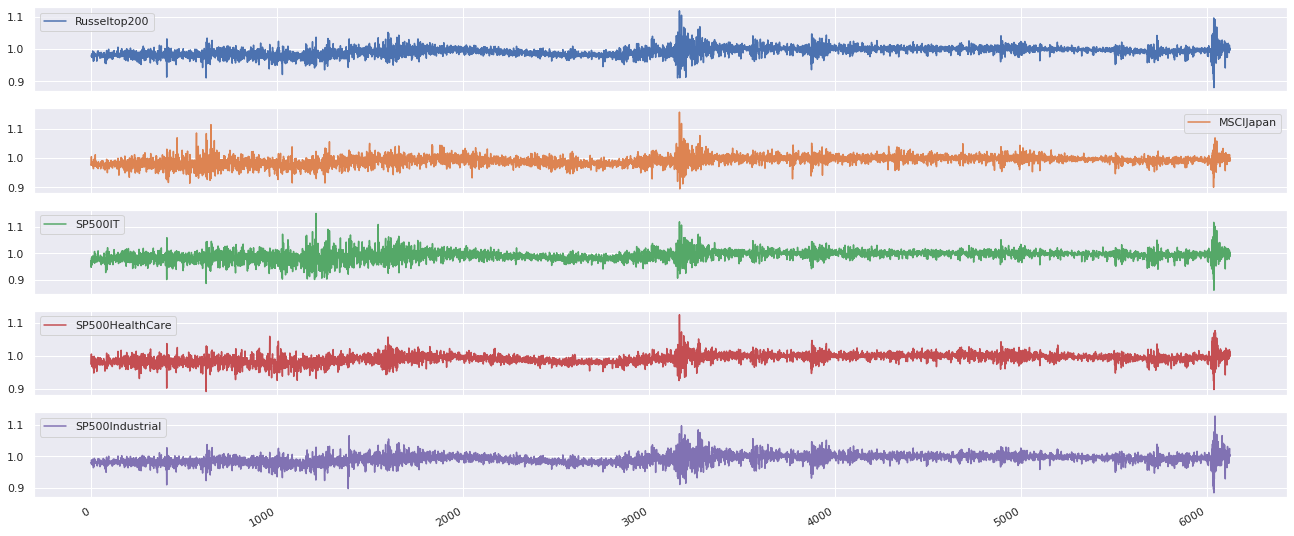

In [5]:
features_considered = ['Russeltop200','MSCIJapan','SP500IT','SP500HealthCare','SP500Industrial']
series = data1[features_considered]
series.head()
series.plot(subplots = True,figsize = (20,10))

### 5.1.2: Check missing values AND Impute them:
There is no missing values in all Financial time series in Data1.

In [6]:
totalmiss = data1.isnull().sum()
totalmiss

Date               0
Russeltop200       0
MSCIJapan          0
SP500IT            0
SP500HealthCare    0
SP500Industrial    0
dtype: int64

### 5.1.3 Train/Test Split: 

Next we will define the Train/Test sets in this way: Keep 80% early data as y_train and the rest of 20% data as test data. Each point in the series represents a day.


4900 1225


array([   1,    2,    3, ..., 1223, 1224, 1225])

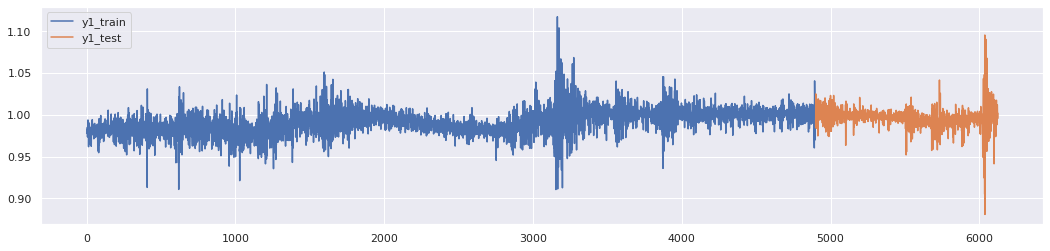

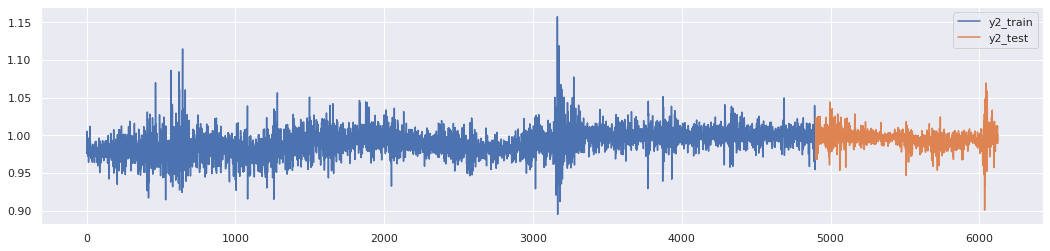

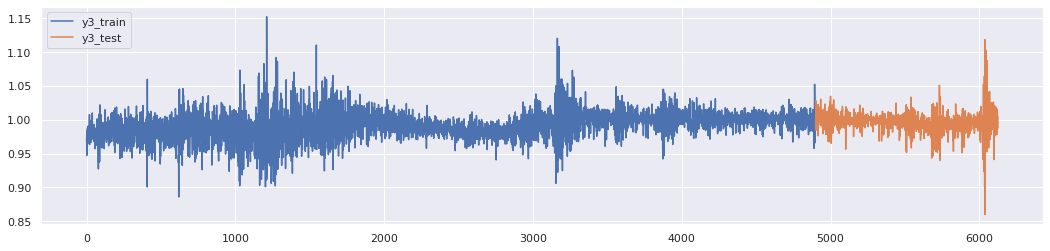

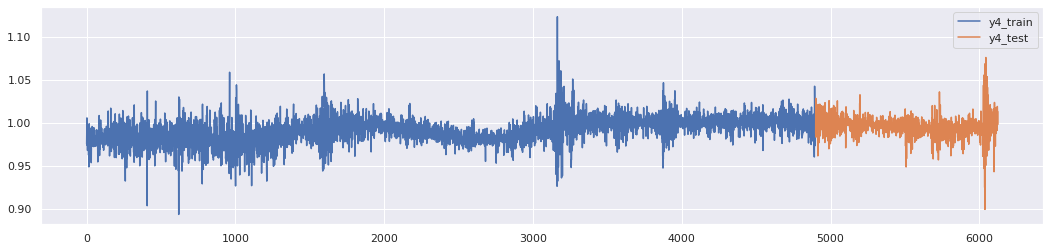

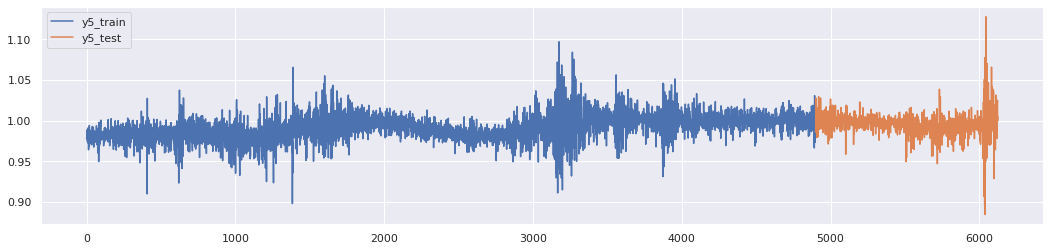

In [7]:
# Make sure the length of test/train set:
# Want to write a function(method, percentage)
testsize = 0.2

y1 = series['Russeltop200']
y2 = series['MSCIJapan']
y3 = series['SP500IT']
y4 = series['SP500HealthCare']
y5 = series['SP500Industrial']
fhlength = math.floor(len(y1) * testsize)

y1_train, y1_test = temporal_train_test_split(y1, test_size=fhlength)
plot_ys(y1_train, y1_test, labels=["y1_train", "y1_test"])
print(y1_train.shape[0], y1_test.shape[0])

y2_train, y2_test = temporal_train_test_split(y2, test_size=fhlength)
plot_ys(y2_train, y2_test, labels=["y2_train", "y2_test"])

y3_train, y3_test = temporal_train_test_split(y3, test_size=fhlength)
plot_ys(y3_train, y3_test, labels=["y3_train", "y3_test"])

y4_train, y4_test = temporal_train_test_split(y4, test_size=fhlength)
plot_ys(y4_train, y4_test, labels=["y4_train", "y4_test"])

y5_train, y5_test = temporal_train_test_split(y5, test_size=fhlength)
plot_ys(y5_train, y5_test, labels=["y5_train", "y5_test"])

# Set Forecasting interval:
fh = np.arange(len(y1_test)) + 1
fh

## 5.2. Univariate Forecasting
In order to make forecasts, we need to Train differenet models:
First of all, check stationary:

In [8]:
#Stationary check:
def augmented_dickey_fuller_statistics(time_series):
    result = adfuller(time_series.values)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))


print('Augmented Dickey-Fuller Test: Russeltop200 Time Series')
augmented_dickey_fuller_statistics(y1_train)
print('Augmented Dickey-Fuller Test: MSCIJAPAN Time Series')
augmented_dickey_fuller_statistics(y2_train)
print('Augmented Dickey-Fuller Test: SP500IT Time Series')
augmented_dickey_fuller_statistics(y3_train)
print('Augmented Dickey-Fuller Test: SP500HealthCare Time Series')
augmented_dickey_fuller_statistics(y4_train)
print('Augmented Dickey-Fuller Test: SP500Industrial Time Series')
augmented_dickey_fuller_statistics(y5_train)

Augmented Dickey-Fuller Test: Russeltop200 Time Series
ADF Statistic: -2.738239
p-value: 0.067652
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Augmented Dickey-Fuller Test: MSCIJAPAN Time Series
ADF Statistic: -3.173556
p-value: 0.021567
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Augmented Dickey-Fuller Test: SP500IT Time Series
ADF Statistic: -4.106062
p-value: 0.000946
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Augmented Dickey-Fuller Test: SP500HealthCare Time Series
ADF Statistic: -2.839443
p-value: 0.052857
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Augmented Dickey-Fuller Test: SP500Industrial Time Series
ADF Statistic: -3.249027
p-value: 0.017317
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


Almost all p-value = 0 < 0.05 - 0.06: Stationary Series

### Sktime
### 5.2.1: Naive Forecaster:
Different statistical models/ML models

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f25a3cec278>)

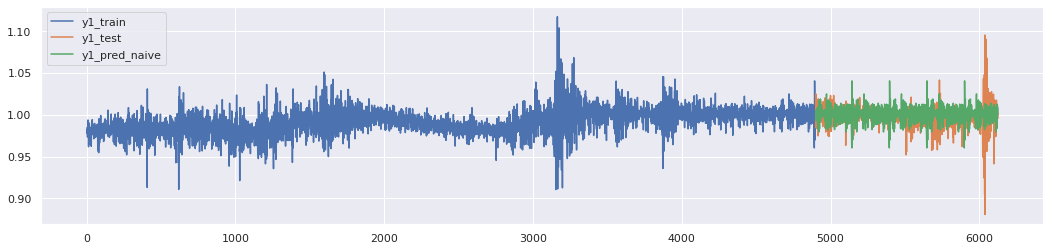

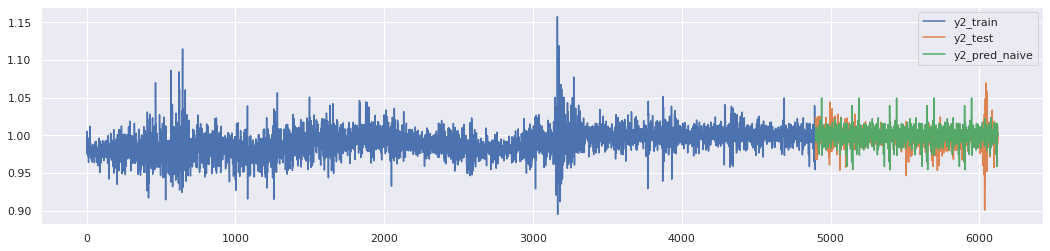

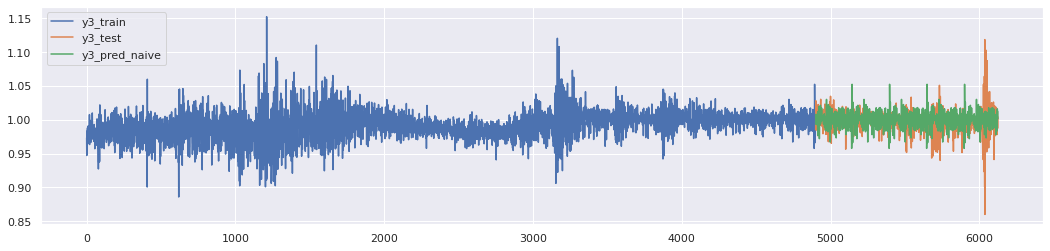

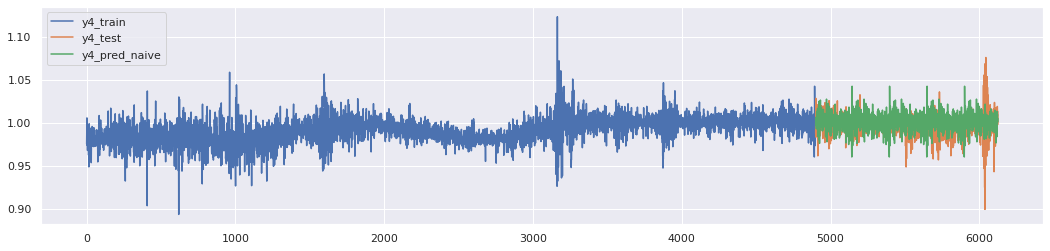

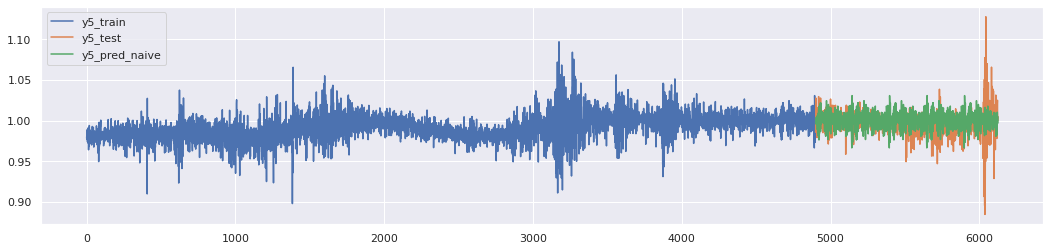

In [9]:
# using sktime NaiveForecaster with seasonality
from sktime.forecasting.naive import NaiveForecaster
#Daily data, assume 252 trading days
# Consider Seasonality, "Seasonal_last" forecasts the last value of the same seanson in the training series.
forecaster = NaiveForecaster(strategy="seasonal_last",sp=252)


forecaster.fit(y1_train)
y1_pred_naive = forecaster.predict(fh)
plot_ys(y1_train, y1_test, y1_pred_naive, labels=["y1_train", "y1_test", "y1_pred_naive"])

forecaster.fit(y2_train)
y2_pred_naive = forecaster.predict(fh)
plot_ys(y2_train, y2_test, y2_pred_naive, labels=["y2_train", "y2_test", "y2_pred_naive"])

forecaster.fit(y3_train)
y3_pred_naive = forecaster.predict(fh)
plot_ys(y3_train, y3_test, y3_pred_naive, labels=["y3_train", "y3_test", "y3_pred_naive"])

forecaster.fit(y4_train)
y4_pred_naive = forecaster.predict(fh)
plot_ys(y4_train, y4_test, y4_pred_naive, labels=["y4_train", "y4_test", "y4_pred_naive"])

forecaster.fit(y5_train)
y5_pred_naive = forecaster.predict(fh)
plot_ys(y5_train, y5_test, y5_pred_naive, labels=["y5_train", "y5_test", "y5_pred_naive"])

### 5.2.2 Statistical Model: Exponential Smoothing 

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f25a71c1eb8>)

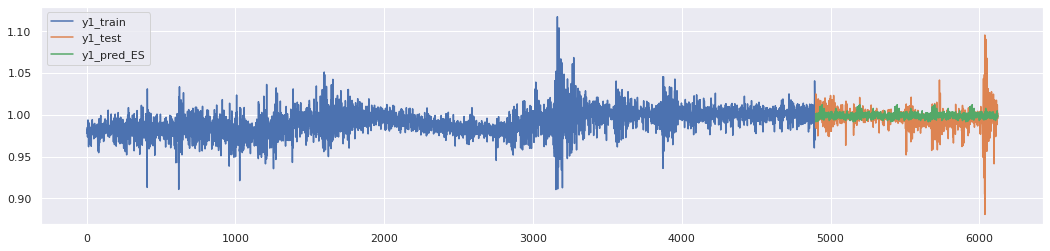

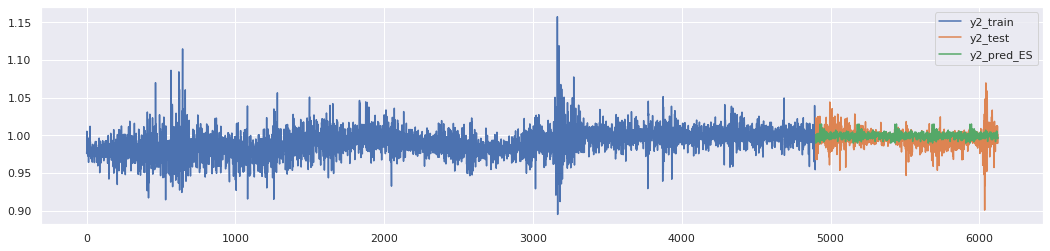

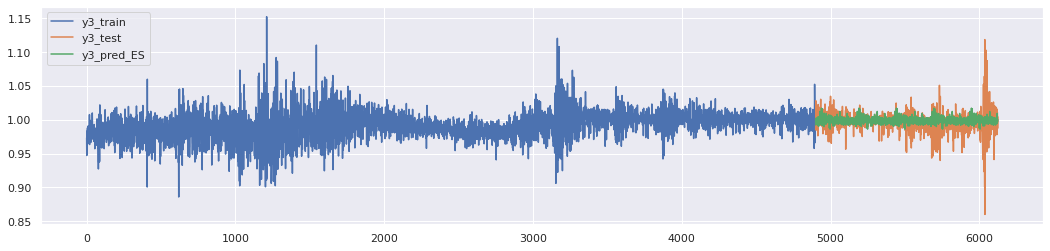

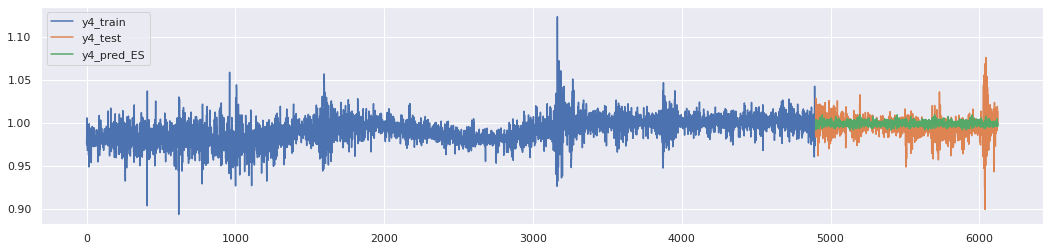

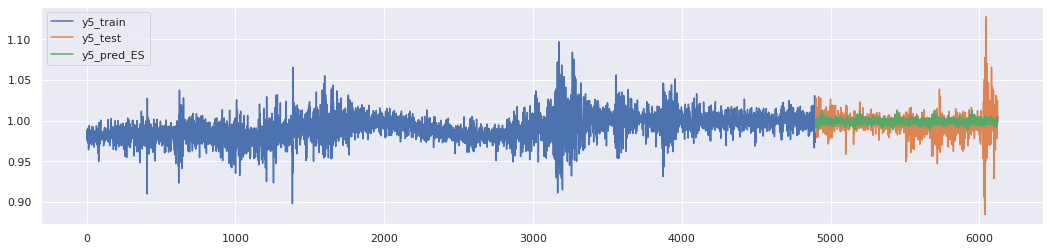

In [10]:
# Statistical Forecasters: Consider Trend and Seasonality
# sp: Seasonal periodicity, the number of period per year
# trend must be one of: 'add', 'mul', 'additive', 'multiplicative'
# seasonal must be one of: 'add', 'mul', 'additive', 'multiplicative'
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
forecaster = ExponentialSmoothing(sp=252,seasonal = "multiplicative")

forecaster.fit(y1_train)
y1_pred_ES = forecaster.predict(fh)
plot_ys(y1_train, y1_test, y1_pred_ES, labels=["y1_train", "y1_test", "y1_pred_ES"]);

forecaster.fit(y2_train)
y2_pred_ES = forecaster.predict(fh)
plot_ys(y2_train, y2_test, y2_pred_ES, labels=["y2_train", "y2_test", "y2_pred_ES"]);

forecaster.fit(y3_train)
y3_pred_ES = forecaster.predict(fh)
plot_ys(y3_train, y3_test, y3_pred_ES, labels=["y3_train", "y3_test", "y3_pred_ES"])

forecaster.fit(y4_train)
y4_pred_ES = forecaster.predict(fh)
plot_ys(y4_train, y4_test, y4_pred_ES, labels=["y4_train", "y4_test", "y4_pred_ES"]);

forecaster.fit(y5_train)
y5_pred_ES = forecaster.predict(fh)
plot_ys(y5_train, y5_test, y5_pred_ES, labels=["y5_train", "y5_test", "y5_pred_ES"])

### 5.2.3: Theta Forecaster 

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f25afb5fe48>)

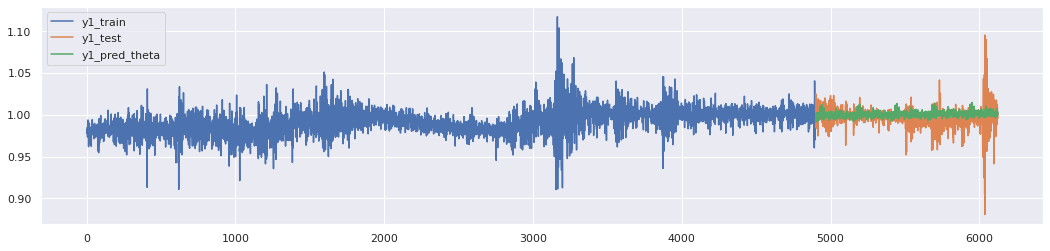

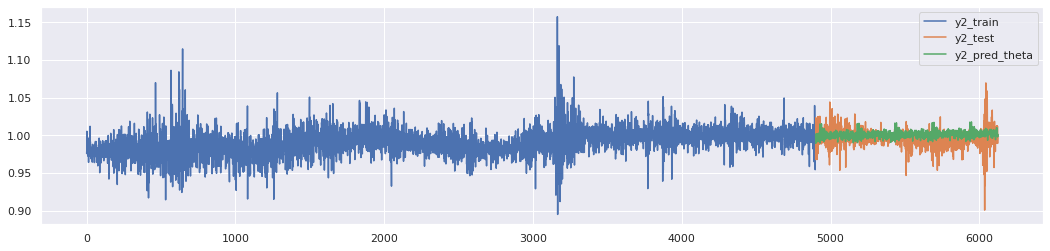

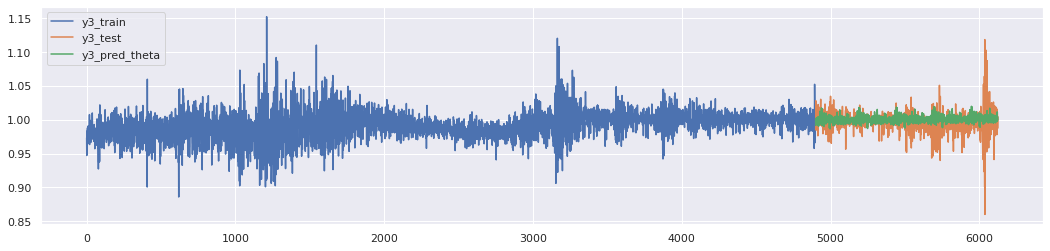

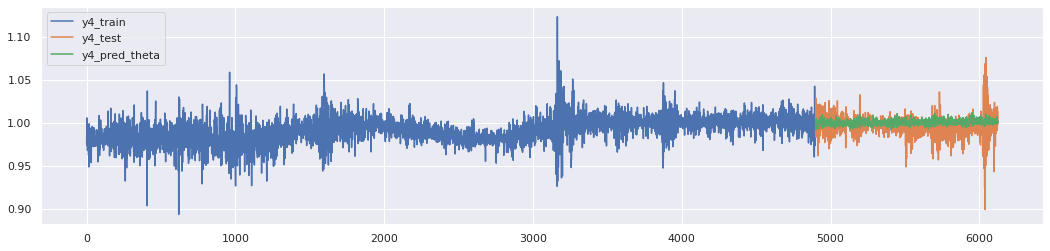

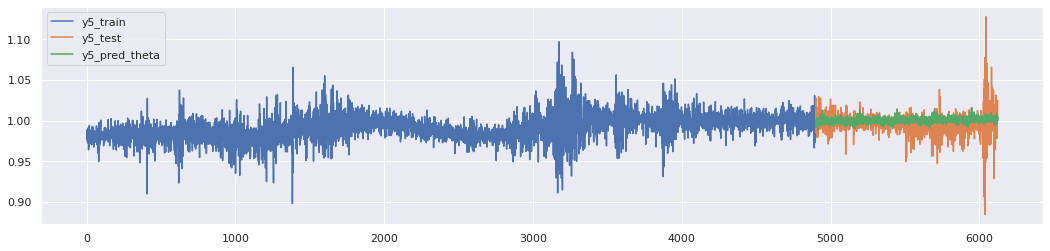

In [11]:
from sktime.forecasting.theta import ThetaForecaster
forecaster = ThetaForecaster(sp=252)

alpha = 0.05  # 95% prediction intervals

forecaster.fit(y1_train)
y1_pred_theta,y1_pred_ints = forecaster.predict(fh,return_pred_int=True, alpha=alpha)
plot_ys(y1_train, y1_test, y1_pred_theta, labels=["y1_train", "y1_test", "y1_pred_theta"]);

forecaster.fit(y2_train)
y2_pred_theta,y2_pred_ints = forecaster.predict(fh,return_pred_int=True, alpha=alpha)
plot_ys(y2_train, y2_test, y2_pred_theta, labels=["y2_train", "y2_test", "y2_pred_theta"]);

forecaster.fit(y3_train)
y3_pred_theta,y3_pred_ints = forecaster.predict(fh,return_pred_int=True, alpha=alpha)
plot_ys(y3_train, y3_test, y3_pred_theta, labels=["y3_train", "y3_test", "y3_pred_theta"])

forecaster.fit(y4_train)
y4_pred_theta,y4_pred_ints = forecaster.predict(fh,return_pred_int=True, alpha=alpha)
plot_ys(y4_train, y4_test, y4_pred_theta, labels=["y4_train", "y4_test", "y4_pred_theta"]);

forecaster.fit(y5_train)
y5_pred_theta,y5_pred_ints = forecaster.predict(fh,return_pred_int=True, alpha=alpha)
plot_ys(y5_train, y5_test, y5_pred_theta, labels=["y5_train", "y5_test", "y5_pred_theta"])

### 5.2.4: Regression model: KNN Regression 

Sktime provides a meta-estimator for this approach, so that we can easily apply any scikit-learn regressor to solve our forecasting problem.
We are going to test KNN Regression model and Random Forest Model as example.

1. **tuneable** allow us to use hyper parameters(winsow length/strategy,but no lags?) to generate forecasts.

2. **adaptive**: it adapts the scikit-learn’s estimator interface to that of a forecaster, making sure that we can tune and properly evaluate our model

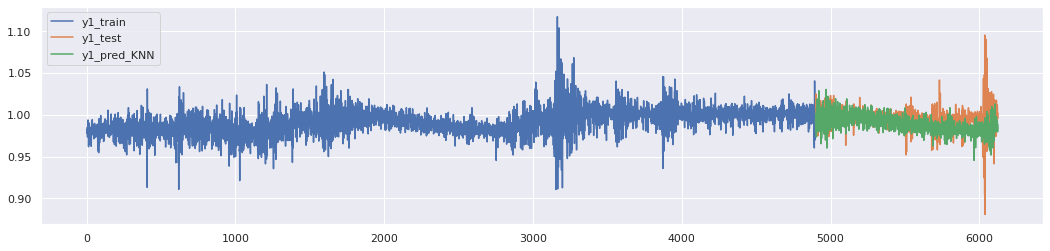

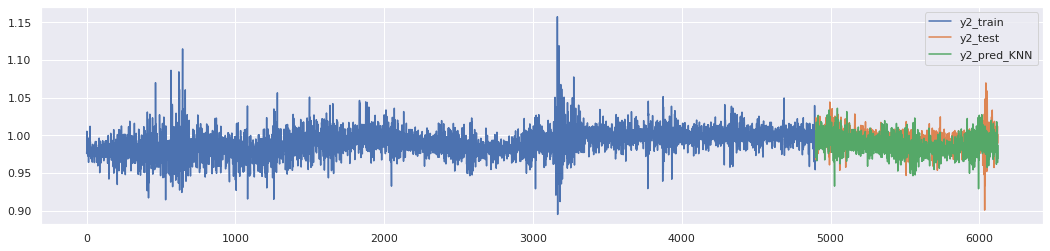

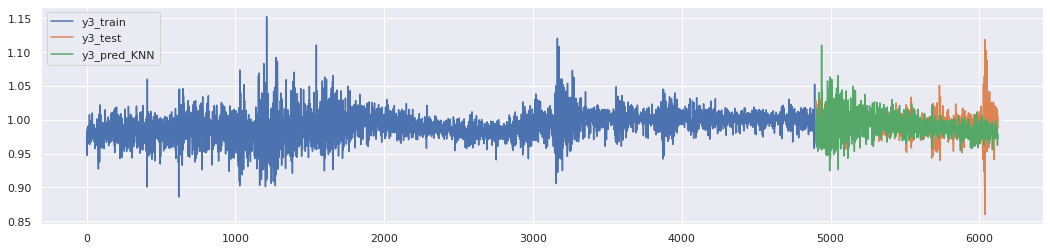

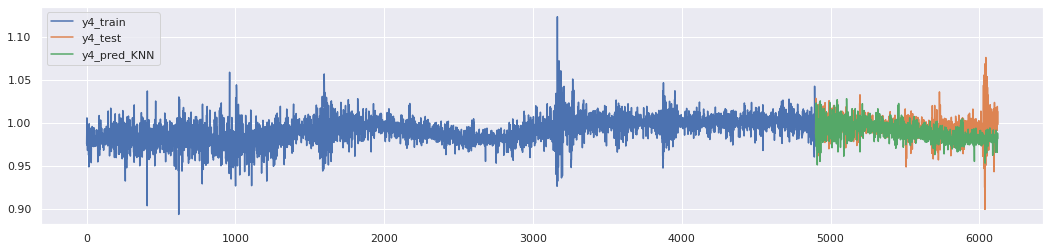

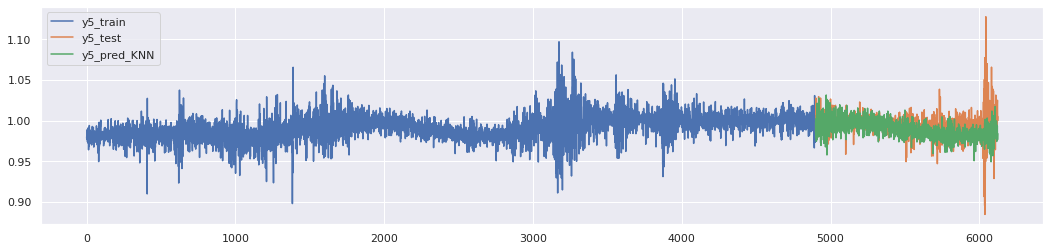

In [ ]:
# Using Regression Models:
from sktime.forecasting.compose import ReducedRegressionForecaster
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
# Strategy can be 'direct'/'recursive'/'dirrec'
regressor = KNeighborsRegressor(n_neighbors=1)
forecaster = ReducedRegressionForecaster(regressor=regressor, window_length=10,strategy = "recursive") 
# I have tried "direct" and "dirrec" strategy, not good!

forecaster.fit(y1_train)
y1_pred_KNN = forecaster.predict(fh)
plot_ys(y1_train, y1_test, y1_pred_KNN, labels=["y1_train", "y1_test", "y1_pred_KNN"]);

forecaster.fit(y2_train)
y2_pred_KNN = forecaster.predict(fh)
plot_ys(y2_train, y2_test, y2_pred_KNN, labels=["y2_train", "y2_test", "y2_pred_KNN"]);

forecaster.fit(y3_train)
y3_pred_KNN = forecaster.predict(fh)
plot_ys(y3_train, y3_test, y3_pred_KNN, labels=["y3_train", "y3_test", "y3_pred_KNN"]);

forecaster.fit(y4_train)
y4_pred_KNN = forecaster.predict(fh)
plot_ys(y4_train, y4_test, y4_pred_KNN, labels=["y4_train", "y4_test", "y4_pred_KNN"]);

forecaster.fit(y5_train)
y5_pred_KNN = forecaster.predict(fh)
plot_ys(y5_train, y5_test, y5_pred_KNN, labels=["y5_train", "y5_test", "y5_pred_KNN"]);

**Windows- like Cross validation**
".....To better understand the prior data transformation, we can look at how we can split the training series into windows. Internally, sktime uses a temporal time series splitter, similar to the cross-validation splitter in scikit-learn"

### 5.2.5 Random Forest with Tunning

In [ ]:
from sktime.forecasting.model_selection import ForecastingGridSearchCV
from sktime.forecasting.model_selection import SlidingWindowSplitter
from sktime.forecasting.compose import EnsembleForecaster
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.transformers.single_series.detrend import Detrender
from sktime.forecasting.compose import TransformedTargetForecaster
from sktime.transformers.single_series.detrend import Deseasonalizer

# Tunning parameters:
regressor = RandomForestRegressor(n_estimators=100,random_state=64)
forecaster = ReducedRegressionForecaster(regressor=regressor,window_length=10, strategy="recursive")
param_grid = {"window_length": [10,15,20,25]}

# we fit the forecaster on the initial window, and then use temporal cross-validation to find the optimal parameter
cv = SlidingWindowSplitter(initial_window=int(len(y1_train) * 0.5))
gscv1 = ForecastingGridSearchCV(forecaster, cv=cv, param_grid=param_grid)
gscv2 = ForecastingGridSearchCV(forecaster, cv=cv, param_grid=param_grid)
gscv3 = ForecastingGridSearchCV(forecaster, cv=cv, param_grid=param_grid)
gscv4 = ForecastingGridSearchCV(forecaster, cv=cv, param_grid=param_grid)
gscv5 = ForecastingGridSearchCV(forecaster, cv=cv, param_grid=param_grid)

gscv1.fit(y1_train)
y1_pred_RRF = gscv1.predict(fh)
plot_ys(y1_train, y1_test, y1_pred_RRF, labels=["y1_train", "y1_test", "y1_pred_RRF"]);

gscv2.fit(y2_train)
y2_pred_RRF = gscv2.predict(fh)
plot_ys(y2_train, y2_test, y2_pred_RRF, labels=["y2_train", "y2_test", "y2_pred_RRF"]);

gscv3.fit(y3_train)
y3_pred_RRF = gscv3.predict(fh)
plot_ys(y3_train, y3_test, y3_pred_RRF, labels=["y3_train", "y3_test", "y3_pred_RRF"]);

gscv4.fit(y4_train)
y4_pred_RRF = gscv4.predict(fh)
plot_ys(y4_train, y4_test, y4_pred_RRF, labels=["y4_train", "y4_test", "y4_pred_RRF"]);

gscv5.fit(y5_train)
y5_pred_RRF = gscv5.predict(fh)
plot_ys(y5_train, y5_test, y5_pred_RRF, labels=["y5_train", "y5_test", "y5_pred_RRF"]);

In [ ]:
# Check the hyperparameters:
print(gscv1.best_params_)
print(gscv2.best_params_)
print(gscv3.best_params_)
print(gscv4.best_params_)
print(gscv5.best_params_)

### 5.2.6: KNN model + Pipeline + Tunning
ReducedRegressionForecaster(Tuning),PolynomialTrendForecaster(Detrending)
Then we can **Pipelining**: Use the detrender in a pipline together with de-seasonalisation. When do the data-transformation before fitting, we need to apply inverse transformation to predicted values:

In [ ]:
# Tunning parameters:
regressor = KNeighborsRegressor(n_neighbors=1)
forecaster = ReducedRegressionForecaster(regressor=regressor,
                                         window_length=10, strategy="recursive")
param_grid = {"window_length": [10,15,20,25]}

# we fit the forecaster on the initial window, and then use temporal cross-validation to find the optimal parameter
cv = SlidingWindowSplitter(initial_window=int(len(y1_train) * 0.5))
gscv1 = ForecastingGridSearchCV(forecaster, cv=cv, param_grid=param_grid)
gscv2 = ForecastingGridSearchCV(forecaster, cv=cv, param_grid=param_grid)
gscv3 = ForecastingGridSearchCV(forecaster, cv=cv, param_grid=param_grid)
gscv4 = ForecastingGridSearchCV(forecaster, cv=cv, param_grid=param_grid)
gscv5 = ForecastingGridSearchCV(forecaster, cv=cv, param_grid=param_grid)

gscv1.fit(y1_train)
gscv2.fit(y2_train)
gscv3.fit(y3_train)
gscv4.fit(y4_train)
gscv5.fit(y5_train)

In [ ]:
# Check the hyperparameters:
print(gscv1.best_params_)
print(gscv2.best_params_)
print(gscv3.best_params_)
print(gscv4.best_params_)
print(gscv5.best_params_)

In [ ]:
regressor = KNeighborsRegressor(n_neighbors=1)
# To transform Data:
forecaster1 = TransformedTargetForecaster([
    ("deseasonalise", Deseasonalizer(model="multiplicative", sp=252)),#Deseasonalize
    ("detrend", Detrender(forecaster=PolynomialTrendForecaster(degree=2))),# Detrend 2nd polynomial trend
    ("forecast", ReducedRegressionForecaster(regressor=regressor, window_length=25, strategy="recursive"))
])

forecaster1.fit(y1_train)
y1_pred_TTF= forecaster1.predict(fh)
plot_ys(y1_train, y1_test, y1_pred_TTF, labels=["y1_train", "y1_test", "y1_pred_TTF"]);

forecaster2 = TransformedTargetForecaster([
    ("deseasonalise", Deseasonalizer(model="multiplicative", sp=252)),#Deseasonalize
    ("detrend", Detrender(forecaster=PolynomialTrendForecaster(degree=2))),# Detrend 2nd polynomial trend
    ("forecast", ReducedRegressionForecaster(regressor=regressor, window_length=20, strategy="recursive"))
])

forecaster2.fit(y2_train)
y2_pred_TTF= forecaster2.predict(fh)
plot_ys(y2_train, y2_test, y2_pred_TTF, labels=["y2_train", "y2_test", "y2_pred_TTF"]);

forecaster3 = TransformedTargetForecaster([
    ("deseasonalise", Deseasonalizer(model="multiplicative", sp=252)),#Deseasonalize
    ("detrend", Detrender(forecaster=PolynomialTrendForecaster(degree=3))),# Detrend 3rd polynomial trend
    ("forecast", ReducedRegressionForecaster(regressor=regressor, window_length=25, strategy="recursive"))
])

forecaster3.fit(y3_train)
y3_pred_TTF= forecaster3.predict(fh)
plot_ys(y3_train, y3_test, y3_pred_TTF, labels=["y3_train", "y3_test", "y3_pred_TTF"]);

forecaster4 = TransformedTargetForecaster([
    ("deseasonalise", Deseasonalizer(model="multiplicative", sp=252)),#Deseasonalize
    ("detrend", Detrender(forecaster=PolynomialTrendForecaster(degree=2))),# Detrend 2nd polynomial trend
    ("forecast", ReducedRegressionForecaster(regressor=regressor, window_length=25, strategy="recursive"))
])

forecaster4.fit(y4_train)
y4_pred_TTF= forecaster4.predict(fh)
plot_ys(y4_train, y4_test, y4_pred_TTF, labels=["y4_train", "y4_test", "y4_pred_TTF"]);

forecaster5 = TransformedTargetForecaster([
    ("deseasonalise", Deseasonalizer(model="multiplicative", sp=252)),#Deseasonalize
    ("detrend", Detrender(forecaster=PolynomialTrendForecaster(degree=2))),# Detrend 2nd polynomial trend
    ("forecast", ReducedRegressionForecaster(regressor=regressor, window_length=20, strategy="recursive"))
])

forecaster5.fit(y5_train)
y5_pred_TTF= forecaster5.predict(fh)
plot_ys(y5_train, y5_test, y5_pred_TTF, labels=["y5_train", "y5_test", "y5_pred_TTF"]);

## 5.3 Multivariate Forecasting: 
Compared to Univariate Forecasting, it consiers the patterns between each time series

### 5.3.1: VAR:
VAR is able to understand and use the relationship between several variables. This is useful for describing the dynamic behavior of the data and also provides better forecasting results.

In [12]:
# loading essential libraries first
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [13]:
data_train,data_test = series[0:-fhlength],series[-fhlength:]
print(data_train.shape, data_test.shape)

(4900, 5) (1225, 5)


In [14]:
# Transformation
# Apply first differencing on training set should make all five series stationary:
train_transformed = data_train.diff().dropna()
train_transformed.head()

,Russeltop200,MSCIJapan,SP500IT,SP500HealthCare,SP500Industrial
1,0.000449,0.004149,-0.026092,0.011813,-0.003190
2,0.000925,0.025357,0.016354,0.018434,0.000279
3,0.003208,-0.029184,0.019848,-0.031487,0.011551
4,-0.002986,0.012387,-0.028034,-0.000312,-0.011495
5,0.005635,-0.008441,0.030279,0.014715,0.004197


In [15]:
#Stationary check:
def augmented_dickey_fuller_statistics(time_series):
    result = adfuller(time_series.values)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))


print('Augmented Dickey-Fuller Test: Russeltop200 Time Series')
augmented_dickey_fuller_statistics(train_transformed['Russeltop200'])
print('Augmented Dickey-Fuller Test: MSCIJAPAN Time Series')
augmented_dickey_fuller_statistics(train_transformed['MSCIJapan'])
print('Augmented Dickey-Fuller Test: SP500IT Time Series')
augmented_dickey_fuller_statistics(train_transformed['SP500IT'])
print('Augmented Dickey-Fuller Test: SP500HealthCare Time Series')
augmented_dickey_fuller_statistics(train_transformed['SP500HealthCare'])
print('Augmented Dickey-Fuller Test: SP500Industrial Time Series')
augmented_dickey_fuller_statistics(train_transformed['SP500Industrial'])

# p-value = 0: Stationary

Augmented Dickey-Fuller Test: Russeltop200 Time Series
ADF Statistic: -19.854956
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Augmented Dickey-Fuller Test: MSCIJAPAN Time Series
ADF Statistic: -21.363581
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Augmented Dickey-Fuller Test: SP500IT Time Series
ADF Statistic: -22.403440
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Augmented Dickey-Fuller Test: SP500HealthCare Time Series
ADF Statistic: -22.030333
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Augmented Dickey-Fuller Test: SP500Industrial Time Series
ADF Statistic: -22.761096
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [17]:
# Casuation Testing using Granger's Casuality test: (Correlation)
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=8

test = 'ssr-chi2test'

def grangers_causality_matrix(data, variables, test = 'ssr_chi2test', verbose=False):

    dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)

    for c in dataset.columns:
        for r in dataset.index:
            test_result = grangercausalitytests(data[[r,c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')

            min_p_value = np.min(p_values)
            dataset.loc[r,c] = min_p_value

    dataset.columns = [var + '_x' for var in variables]

    dataset.index = [var + '_y' for var in variables]

    return dataset

grangers_causality_matrix(train_transformed, variables = train_transformed.columns)

,Russeltop200_x,MSCIJapan_x,SP500IT_x,SP500HealthCare_x,SP500Industrial_x
Russeltop200_y,1.0000,0.2388,0.0247,0.0442,0.0104
MSCIJapan_y,0.0001,1.0000,0.1202,0.0013,0.0033
SP500IT_y,0.0000,0.0029,1.0000,0.0006,0.0007
SP500HealthCare_y,0.0000,0.0000,0.0001,1.0000,0.0000
SP500Industrial_y,0.0014,0.0047,0.1142,0.0065,1.0000


In [ ]:
# Fit model:
mod = VAR(train_transformed)
res = mod.fit(maxlags = 15, ic = 'aic')
res.summary()

In [ ]:
# Get the lag order
lag_order = res.k_ar
# Input data for forecasting
input_data = train_transformed.values[-lag_order:]
# forecasting
pred = res.forecast(y=input_data, steps=fhlength)
pred = (pd.DataFrame(pred, index=data_test.index, columns=data_test.columns + '_pred'))


In [ ]:
# inverting transformation
def invert_transformation(X_train, pred):
    forecast = pred.copy()
    columns = X_train.columns
    for col in columns:
        forecast[str(col)+'_pred'] = X_train[col].iloc[-1] + forecast[str(col)+'_pred'].cumsum()
    return forecast

output = invert_transformation(data_train, pred)
output

In [ ]:
y1_pred_VAR = output['Russeltop200_pred']
plot_ys(y1_train, y1_test, y1_pred_VAR, labels=["y1_train", "y1_test", "y1_pred_VAR"])
y2_pred_VAR = output['MSCIJapan_pred']
plot_ys(y2_train, y2_test, y2_pred_VAR, labels=["y2_train", "y2_test", "y2_pred_VAR"])
y3_pred_VAR = output['SP500IT_pred']
plot_ys(y3_train, y3_test, y3_pred_VAR, labels=["y3_train", "y3_test", "y3_pred_VAR"])
y4_pred_VAR = output['SP500HealthCare_pred']
plot_ys(y4_train, y4_test, y4_pred_VAR, labels=["y4_train", "y4_test", "y4_pred_VAR"])
y5_pred_VAR = output['SP500Industrial_pred']
plot_ys(y5_train, y5_test, y5_pred_VAR, labels=["y5_train", "y5_test", "y5_pred_VAR"])

### 5.3.2: ESRNN:
(Coding please see another Notebook! Requires GPU)


In [ ]:
## Deep Learning Techniques! Please check another Notebook!
ESRNN_result = pd.read_csv('ESRNN.csv')
y1_pred_ESRNN = ESRNN_result['Russeltop200']
y2_pred_ESRNN = ESRNN_result['MSCIJapan']
y3_pred_ESRNN = ESRNN_result['SP500IT']
y4_pred_ESRNN = ESRNN_result['SP500HealthCare']
y5_pred_ESRNN = ESRNN_result['SP500Industrial']

y1_pred_ESRNN.index = y1_pred_naive.index
y2_pred_ESRNN.index = y1_pred_naive.index
y3_pred_ESRNN.index = y1_pred_naive.index
y4_pred_ESRNN.index = y1_pred_naive.index
y5_pred_ESRNN.index = y1_pred_naive.index

plot_ys(y1_train, y1_test, y1_pred_ESRNN, labels=["y1_train", "y1_test", "y1_pred_ESRNN"])
plot_ys(y2_train, y2_test, y2_pred_ESRNN, labels=["y2_train", "y2_test", "y2_pred_ESRNN"])
plot_ys(y3_train, y3_test, y3_pred_ESRNN, labels=["y3_train", "y3_test", "y3_pred_ESRNN"])
plot_ys(y4_train, y4_test, y4_pred_ESRNN, labels=["y4_train", "y4_test", "y4_pred_ESRNN"])
plot_ys(y5_train, y5_test, y5_pred_ESRNN, labels=["y5_train", "y5_test", "y5_pred_ESRNN"])

## 5.4. Performance Metrics:

Two common metrics in Forecasting are
MASE (mean absolute scaled error) and sMAPE (symmetric mean absolute percentage error),
1. **sMAPE** / **95%Prediction Interval**

2. **MASE** , **MAE**, **RMSE**


### 5.4.1: 95% Prediction Interval (Theta Example:)
So far, we’ve only looked at point forecasts. In many cases, we’re also interested in prediction intervals. sktime’s interface support prediction intervals, but we haven’t implemented them for all algorithms yet.

#### 5.4.1.1: Prediction interval example for ThetaForecaster

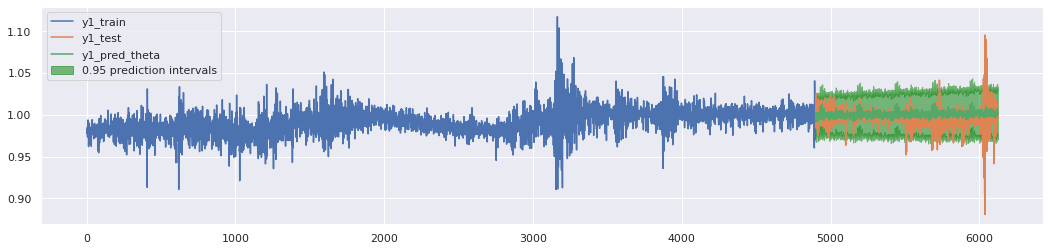

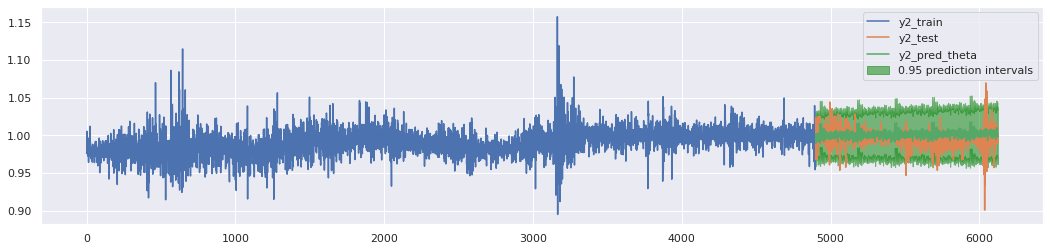

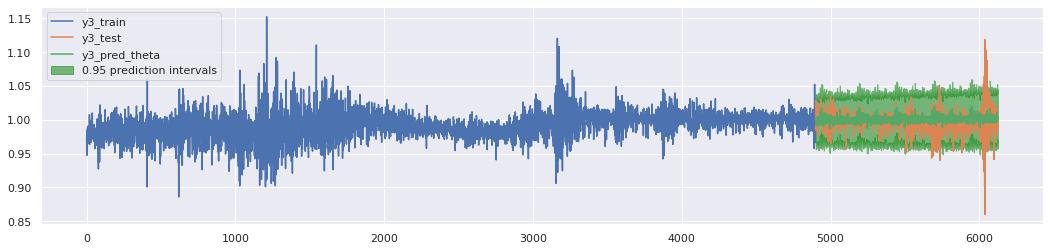

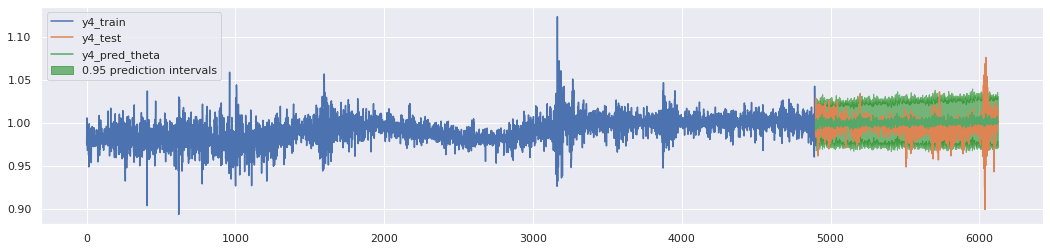

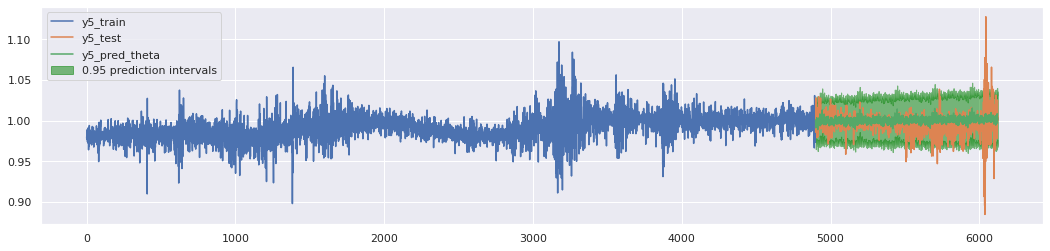

In [36]:
fig, ax1 = plot_ys(y1_train, y1_test, y1_pred_theta, labels=["y1_train", "y1_test", "y1_pred_theta"])
ax1.fill_between(y1_pred_theta.index, y1_pred_ints["lower"], y1_pred_ints["upper"], alpha=0.5, 
                color="green", label=f"{1 - alpha} prediction intervals")
plt.legend();
fig, ax2 = plot_ys(y2_train, y2_test, y2_pred_theta, labels=["y2_train", "y2_test", "y2_pred_theta"])
ax2.fill_between(y2_pred_theta.index, y2_pred_ints["lower"], y2_pred_ints["upper"], alpha=0.5, 
                color="green", label=f"{1 - alpha} prediction intervals")
plt.legend();
fig, ax3 = plot_ys(y3_train, y3_test, y3_pred_theta, labels=["y3_train", "y3_test", "y3_pred_theta"])
ax3.fill_between(y3_pred_theta.index, y3_pred_ints["lower"], y3_pred_ints["upper"], alpha=0.5, 
                color="green", label=f"{1 - alpha} prediction intervals")
plt.legend();
fig, ax4 = plot_ys(y4_train, y4_test, y4_pred_theta, labels=["y4_train", "y4_test", "y4_pred_theta"])
ax4.fill_between(y4_pred_theta.index, y4_pred_ints["lower"], y4_pred_ints["upper"], alpha=0.5, 
                color="green", label=f"{1 - alpha} prediction intervals")
plt.legend();
fig, ax5 = plot_ys(y5_train, y5_test, y5_pred_theta, labels=["y5_train", "y5_test", "y5_pred_theta"])
ax5.fill_between(y5_pred_theta.index, y5_pred_ints["lower"], y5_pred_ints["upper"], alpha=0.5, 
                color="green", label=f"{1 - alpha} prediction intervals")
plt.legend();

In [34]:
plt.savefig('figure3',bbox_inches = 'tight')

<Figure size 432x288 with 0 Axes>

### 5.4.2：sMAPE

In [ ]:
# this will return based on % (actual * 100)
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred))
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return 200 * np.mean(diff)

### 5.4.3: MAE

In [ ]:
from sklearn.metrics import mean_absolute_error
def mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred) 

### 5.4.4. MASE

In [ ]:
def mase(training_series, testing_series, prediction_series):
    """
    Computes the MEAN-ABSOLUTE SCALED ERROR forcast error for univariate time series prediction.
    
    See "Another look at measures of forecast accuracy", Rob J Hyndman
    
    parameters:
        training_series: the series used to train the model, 1d numpy array
        testing_series: the test series to predict, 1d numpy array or float
        prediction_series: the prediction of testing_series, 1d numpy array (same size as testing_series) or float
        absolute: "squares" to use sum of squares and root the result, "absolute" to use absolute values.
    
    """
    n = training_series.shape[0]
    d = np.abs(  np.diff( training_series) ).sum()/(n-1)
    
    errors = np.abs(testing_series - prediction_series )
    return errors.mean()/d

### 5.4.5: RMSE

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2)
    return sqrt(mse) 

## 5.5 Time Series Model Forecasting Evaluation

### 5.5.1: Russeltop200:

In [ ]:
# Directly.....
y1_pred_results = [y1_pred_naive, y1_pred_ES, y1_pred_theta, y1_pred_KNN, y1_pred_RRF, y1_pred_TTF, y1_pred_VAR,y1_pred_ESRNN]
smape_list = []
mae_list = []
mase_list =[]
rmse_list = []
r2_list = []
for i in range(len(y1_pred_results)):
    # sMAPE:
    smape_temp = smape(y1_test, y1_pred_results[i])
    smape_list.append(smape_temp)
    # MAE:
    mae_temp = mae(y1_test, y1_pred_results[i])
    mae_list.append(mae_temp)
    # MASE:
    mase_temp = mase(y1_train, y1_test, y1_pred_results[i])
    mase_list.append(mase_temp)
    # RMSE
    rmse_temp = rmse(y1_test, y1_pred_results[i])
    rmse_list.append(rmse_temp)    
Metric_Russeltop200 = pd.DataFrame({
    'Models': ['Naive', 'Exponential Smoothing', 'Theta','KNN','RRF','TTF',
              'VAR','ESRNN'],
    
    'sMAPE': smape_list,
    'MAE': mae_list,
    'MASE': mase_list,
    'RMSE': rmse_list,
    })
Metric_Russeltop200

In [ ]:
#Metric_Russeltop200.to_latex(index=False)

### 5.5.2: MSCIJapan:

In [ ]:
y2_pred_results = [y2_pred_naive, y2_pred_ES, y2_pred_theta, y2_pred_KNN, y2_pred_RRF, y2_pred_TTF, y2_pred_VAR,y2_pred_ESRNN]
smape_list2 = []
mae_list2 = []
mase_list2 =[]
rmse_list2 = []
for i in range(len(y2_pred_results)):
    # sMAPE:
    smape_temp = smape(y2_test, y2_pred_results[i])
    smape_list2.append(smape_temp)
    # MAE:
    mae_temp = mae(y2_test, y2_pred_results[i])
    mae_list2.append(mae_temp)
    # MASE:
    mase_temp = mase(y2_train, y2_test, y2_pred_results[i])
    mase_list2.append(mase_temp)
    # RMSE
    rmse_temp = rmse(y2_test, y2_pred_results[i])
    rmse_list2.append(rmse_temp) 
    
Metric_MSCIJapan = pd.DataFrame({
    'Models': ['Naive', 'Exponential Smoothing', 'Theta','KNN','RRF','TTF',
              'VAR','ESRNN'],
    
    'sMAPE': smape_list2,
    'MAE': mae_list2,
    'MASE': mase_list2,
    'RMSE': rmse_list2,
    })
Metric_MSCIJapan

In [ ]:
#Metric_MSCIJapan.to_latex(index=False)

### 5.5.3: SP500IT

In [ ]:
y3_pred_results = [y3_pred_naive, y3_pred_ES, y3_pred_theta, y3_pred_KNN, y3_pred_RRF, y3_pred_TTF, y3_pred_VAR,y4_pred_ESRNN]
smape_list3 = []
mae_list3 = []
mase_list3 =[]
rmse_list3 = []
for i in range(len(y3_pred_results)):
    # sMAPE:
    smape_temp = smape(y3_test, y3_pred_results[i])
    smape_list3.append(smape_temp)
    # MAE:
    mae_temp = mae(y3_test, y3_pred_results[i])
    mae_list3.append(mae_temp)
    # MASE:
    mase_temp = mase(y3_train, y3_test, y3_pred_results[i])
    mase_list3.append(mase_temp)
    # RMSE
    rmse_temp = rmse(y3_test, y3_pred_results[i])
    rmse_list3.append(rmse_temp) 
Metric_SP500IT = pd.DataFrame({
    'Models': ['Naive', 'Exponential Smoothing', 'Theta','KNN','RRF','TTF',
              'VAR','ESRNN'],
    
    'sMAPE': smape_list3,
    'MAE': mae_list3,
    'MASE': mase_list3,
    'RMSE': rmse_list3
    })
Metric_SP500IT

In [ ]:
#Metric_SP500IT.to_latex(index=False)

### 5.5.4: SP500 HealthCare

In [ ]:
y4_pred_results = [y4_pred_naive, y4_pred_ES, y4_pred_theta, y4_pred_KNN, y4_pred_RRF, y4_pred_TTF, y4_pred_VAR,y4_pred_ESRNN]
smape_list4 = []
mae_list4 = []
mase_list4 =[]
rmse_list4 = []
for i in range(len(y4_pred_results)):
    # sMAPE:
    smape_temp = smape(y4_test, y4_pred_results[i])
    smape_list4.append(smape_temp)
    # MAE:
    mae_temp = mae(y4_test, y4_pred_results[i])
    mae_list4.append(mae_temp)
    # MASE:
    mase_temp = mase(y4_train, y4_test, y4_pred_results[i])
    mase_list4.append(mase_temp)
    # RMSE
    rmse_temp = rmse(y4_test, y4_pred_results[i])
    rmse_list4.append(rmse_temp) 
Metric_SP500HealthCare = pd.DataFrame({
    'Models': ['Naive', 'Exponential Smoothing', 'Theta','KNN','RRF','TTF',
              'VAR','ESRNN'],
    
    'sMAPE': smape_list4,
    'MAE': mae_list4,
    'MASE': mase_list4,
    'RMSE': rmse_list4
    })
Metric_SP500HealthCare

In [ ]:
#Metric_SP500HealthCare.to_latex(index=False)

### 5.5.5: SP500 Industrial

In [ ]:
y5_pred_results = [y5_pred_naive, y5_pred_ES, y5_pred_theta, y5_pred_KNN, y5_pred_RRF, y5_pred_TTF, y5_pred_VAR,y5_pred_ESRNN]
smape_list5 = []
mae_list5 = []
mase_list5 =[]
rmse_list5 = []
for i in range(len(y5_pred_results)):
    # sMAPE:
    smape_temp = smape(y5_test, y5_pred_results[i])
    smape_list5.append(smape_temp)
    # MAE:
    mae_temp = mae(y5_test, y5_pred_results[i])
    mae_list5.append(mae_temp)
    # MASE:
    mase_temp = mase(y5_train, y5_test, y5_pred_results[i])
    mase_list5.append(mase_temp)
    # RMSE
    rmse_temp = rmse(y5_test, y5_pred_results[i])
    rmse_list5.append(rmse_temp) 
Metric_SP500Industrial = pd.DataFrame({
    'Models': ['Naive', 'Exponential Smoothing', 'Theta','KNN','RRF','TTF',
              'VAR','ESRNN'],
    
    'sMAPE': smape_list5,
    'MAE': mae_list5,
    'MASE': mase_list5,
    'RMSE': rmse_list5
    })
Metric_SP500Industrial

In [ ]:
#Metric_SP500Industrial.to_latex(index=False)

# 7. Results and Conclusions

In [ ]:
naive = pd.DataFrame({
        "Date": data1['Date'].iloc[4900:6126],
        "Russeltop200": y1_pred_naive,
        "MSCIJapan": y2_pred_naive,
        "SP500IT": y3_pred_naive,
        "SP500HealthCare":y4_pred_naive,
        "SP500Industrial": y5_pred_naive
    })
naive.to_csv('D:/data/AAMSFE/Capstone project/outputreturn/naive.csv', index=False)

ES = pd.DataFrame({
        "Date": data1['Date'].iloc[4900:6126],
        "Russeltop200": y1_pred_ES,
        "MSCIJapan": y2_pred_ES,
        "SP500IT": y3_pred_ES,
        "SP500HealthCare":y4_pred_ES,
        "SP500Industrial": y5_pred_ES
    })
ES.to_csv('D:/data/AAMSFE/Capstone project/outputreturn/ES.csv', index=False)

theta = pd.DataFrame({
        "Date": data1['Date'].iloc[4900:6126],
        "Russeltop200": y1_pred_theta,
        "MSCIJapan": y2_pred_theta,
        "SP500IT": y3_pred_theta,
        "SP500HealthCare":y4_pred_theta,
        "SP500Industrial": y5_pred_theta
    })
theta.to_csv('D:/data/AAMSFE/Capstone project/outputreturn/theta.csv', index=False)

KNN = pd.DataFrame({
        "Date": data1['Date'].iloc[4900:6126],
        "Russeltop200": y1_pred_KNN,
        "MSCIJapan": y2_pred_KNN,
        "SP500IT": y3_pred_KNN,
        "SP500HealthCare":y4_pred_KNN,
        "SP500Industrial": y5_pred_KNN
    })
KNN.to_csv('D:/data/AAMSFE/Capstone project/outputreturn/KNN.csv', index=False)

RRF = pd.DataFrame({
        "Date": data1['Date'].iloc[4900:6126],
        "Russeltop200": y1_pred_RRF,
        "MSCIJapan": y2_pred_RRF,
        "SP500IT": y3_pred_RRF,
        "SP500HealthCare":y4_pred_RRF,
        "SP500Industrial": y5_pred_RRF
    })
RRF.to_csv('D:/data/AAMSFE/Capstone project/outputreturn/RRF.csv', index=False)

TTF = pd.DataFrame({
        "Date": data1['Date'].iloc[4900:6126],
        "Russeltop200": y1_pred_TTF,
        "MSCIJapan": y2_pred_TTF,
        "SP500IT": y3_pred_TTF,
        "SP500HealthCare":y4_pred_TTF,
        "SP500Industrial": y5_pred_TTF
    })
TTF.to_csv('D:/data/AAMSFE/Capstone project/outputreturn/TTF.csv', index=False)

VAR = pd.DataFrame({
        "Date": data1['Date'].iloc[4900:6126],
        "Russeltop200": y1_pred_VAR,
        "MSCIJapan": y2_pred_VAR,
        "SP500IT": y3_pred_VAR,
        "SP500HealthCare":y4_pred_VAR,
        "SP500Industrial": y5_pred_VAR
    })
VAR.to_csv('D:/data/AAMSFE/Capstone project/outputreturn/VAR.csv', index=False)